# Presence of fringes in MIRI MRS spectra?  
Let's look at the spectra extracted from different MIRI optical stimuli.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import funcs
import mrsobs

We load the images for one band of the MRS for different kinds of sources, including:  
* MTS 800K BB extended source
* MIRI 800K BB internal calibration source
* MTS 800K BB extended source observed through etalon "ET1A"
* MTS 800K BB extended source observed through 100micron pinhole
* OTIS 800K BB ASPA source (semi-extended)

In [4]:
# Define paths to data
workDir = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir  = workDir+'cdp_data/'
d2cMapDir = workDir+'distortionMaps/'
lvl2path  = workDir+'FM_data/LVL2/'
otisdatapath = workDir+'OTIS_data/'

# Get data
band = '1A'
ext_source_sci,ext_source_bkg         = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='800K')
intcal_source_sci                     = mrsobs.MIRI_internal_calibration_source(lvl2path,band,campaign='FM')
etal_source_sci,etal_source_bkg       = mrsobs.FM_MTS_800K_BB_extended_source_through_etalon(lvl2path,band,etalon='ET1A')
point_source_sci,point_source_bkg     = mrsobs.FM_MTS_800K_BB_MRS_OPT_06_raster(lvl2path,position='middle',pointing='P1')
semiext_source_sci,semiext_source_bkg = mrsobs.OTIS_ASPA_semiextended_source(otisdatapath,band,pointing='v03')

We subtract background exposures where available (Contamination Control Cover closed for internal calibration source observations, no background exposures taken).

In [5]:
# perform transform
ext_source_bkgsubtr     = ext_source_sci-ext_source_bkg
etal_source_bkgsubtr    = etal_source_sci-etal_source_bkg
point_source_bkgsubtr   = point_source_sci-point_source_bkg
semiext_source_bkgsubtr = semiext_source_sci-semiext_source_bkg

We extract a detector pixel trace based on different criteria, including as example:  
* slice number and along-slice position (required geometric distortion calibration information for the latter)
* peak signal of compact source in slice which contains the center of the PSF

In [6]:
d2cMaps   = funcs.load_obj('d2cMaps_band'+band,path=d2cMapDir)
nslices   = d2cMaps['nslices']

# Pixel trace in MRS slice
#-- extended source
ypos_e,xpos_e   = funcs.detpixel_trace(band,d2cMaps,sliceID=nslices/2,alpha_pos=0.)
#-- point source
ypos_p,xpos_p   = funcs.detpixel_trace_compactsource(point_source_bkgsubtr,band,d2cMaps)
#-- semi-extended source
ypos_se,xpos_se = funcs.detpixel_trace_compactsource(semiext_source_bkgsubtr,band,d2cMaps)

Let's look at the 2D images and the extracted spectra through the pixel traces.

In [7]:
from matplotlib import pyplot as plt
plt.style.use('presentation')
%matplotlib notebook

<IPython.core.display.Javascript object>


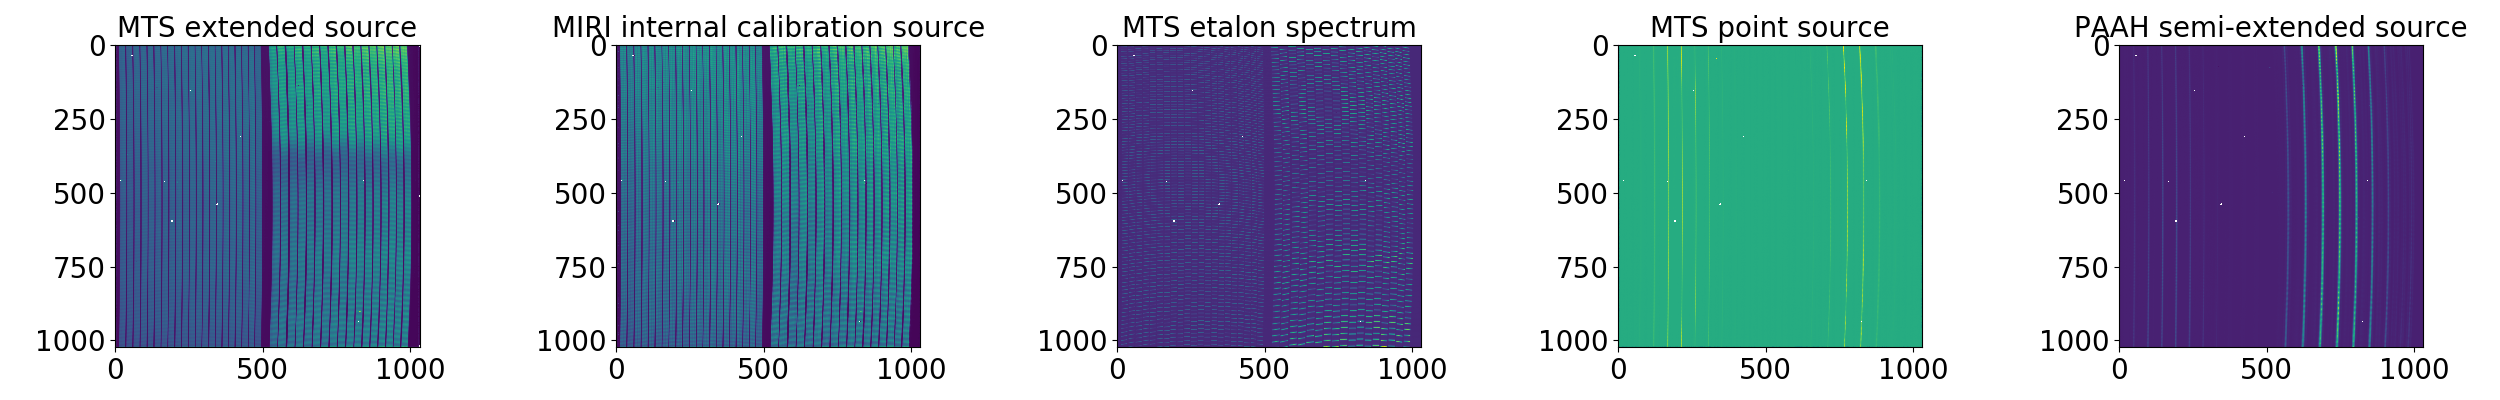

<IPython.core.display.Javascript object>


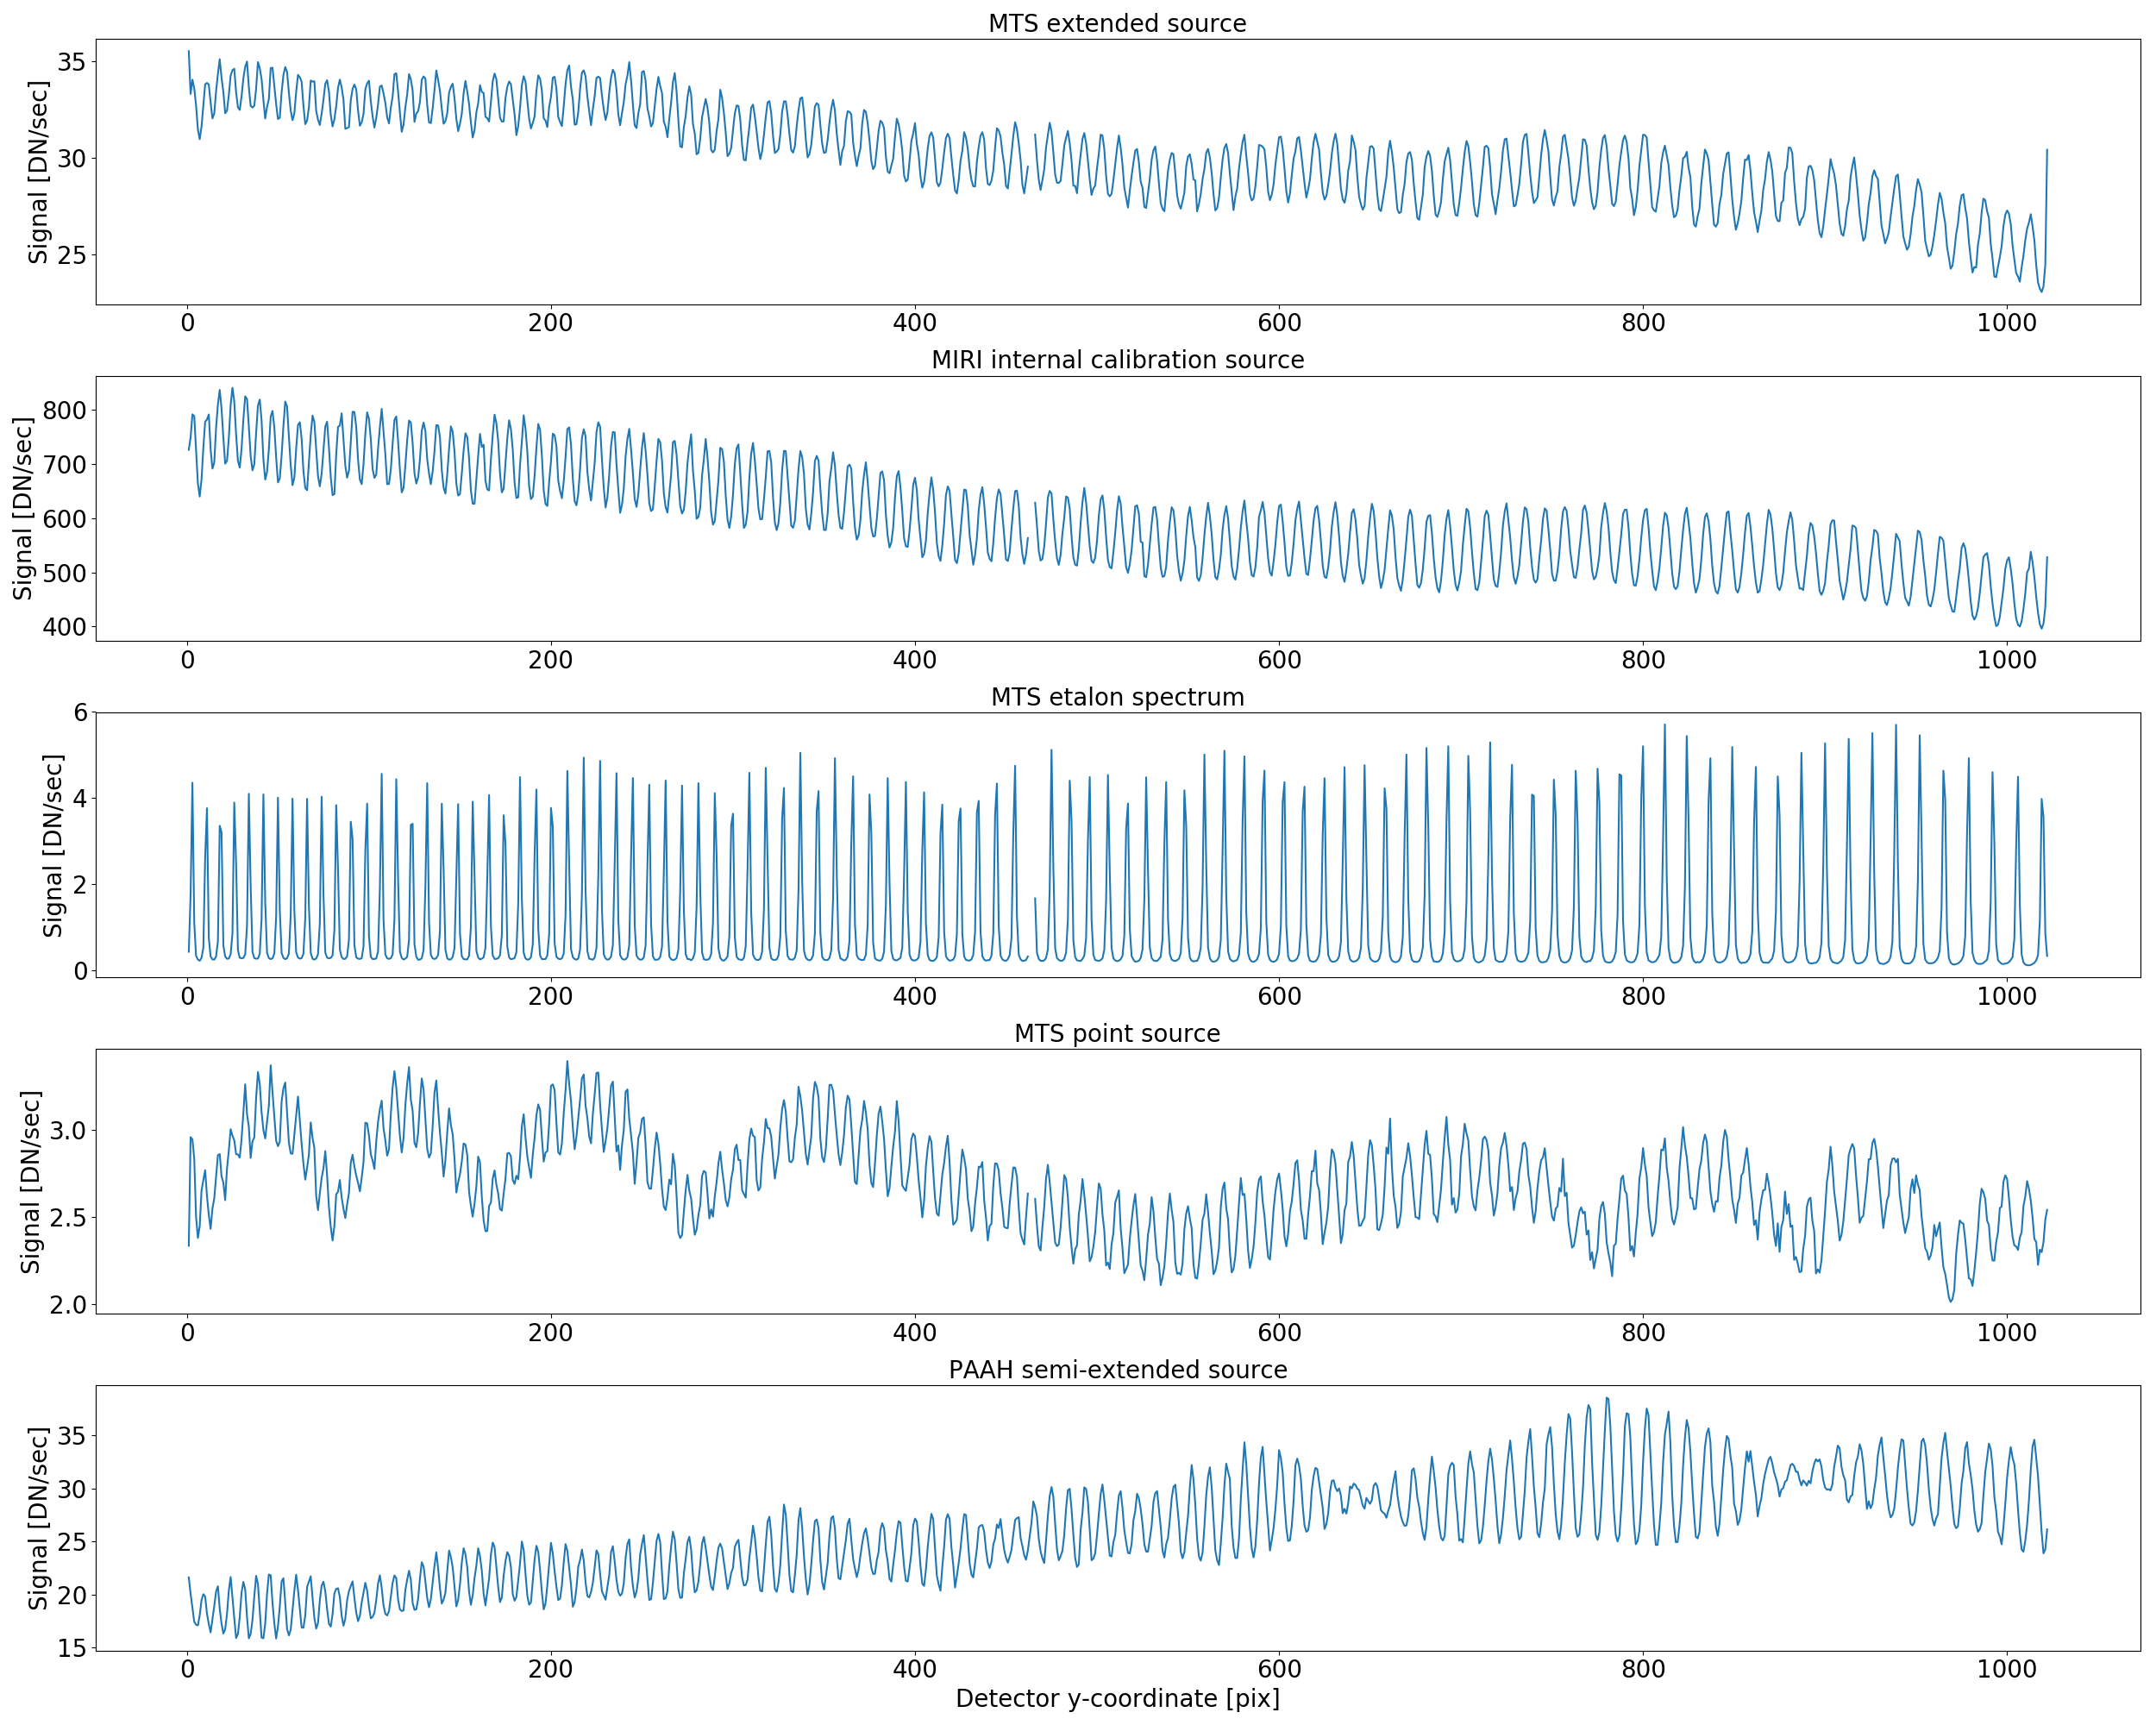

In [8]:
# make plots
fig,axs=plt.subplots(1,5,figsize=(25,4))
axs[0].imshow(ext_source_bkgsubtr)
axs[0].set_title('MTS extended source')
axs[1].imshow(intcal_source_sci)
axs[1].set_title('MIRI internal calibration source')
axs[2].imshow(etal_source_bkgsubtr)
axs[2].set_title('MTS etalon spectrum')
axs[3].imshow(point_source_bkgsubtr)
axs[3].set_title('MTS point source')
axs[4].imshow(semiext_source_bkgsubtr)
axs[4].set_title('PAAH semi-extended source')
plt.tight_layout()

fig,axs=plt.subplots(5,1,figsize=(25,20))
axs[0].plot(ext_source_bkgsubtr[ypos_p,xpos_p])
axs[0].set_title('MTS extended source')
axs[1].plot(intcal_source_sci[ypos_p,xpos_p])
axs[1].set_title('MIRI internal calibration source')
axs[2].plot(etal_source_bkgsubtr[ypos_p,xpos_p])
axs[2].set_title('MTS etalon spectrum')
axs[3].plot(point_source_bkgsubtr[ypos_p,xpos_p])
axs[3].set_title('MTS point source')
axs[4].plot(semiext_source_bkgsubtr[ypos_se,xpos_se])
axs[4].set_title('PAAH semi-extended source')
axs[4].set_xlabel('Detector y-coordinate [pix]')
for plot in range(5): axs[plot].set_ylabel('Signal [DN/sec]')
plt.tight_layout()

## Conclusions:  
* No matter what kind of source is observed with the MIRI MRS, all produced spectra will show fringes. Why? Because the frequency of the constructive and destructive interference produced by the optical setup prior to the Indium bumps (i.e. pixels) is spectrally resolved by the MRS instrument. 
* The extended source spectrum shows a high-frequency fringe and a low-frequency fringe.
* The MIRI internal calibration source spectrum shows a similar fringe pattern as per the one seen in the extended source spectrum (how do these two compare? See Notebook 9).
* The point source spectrum is more difficult to analyze due to the pixel sampling of the PSF (need to find a way to tackle this issue, see Notebook 4). The high-frequency fringe can still be seen, however the low-frequency fringe is not as discernable.
* Although difficult to see, the etalon spectrum also shows fringing along the profile of its peaks. This fringing is presumably produced by the interaction of the monochromatic light with the fringe pattern seen in the spectrum of the extended source.  
* The fringe pattern in the ASPA source spectrum (acquired from the Pass-and-a-half OTIS test) is different from the fringe pattern of the MTS extended source or point source. This is presumably due to the PAAH test set-up, which has three auto-collimating mirrors sample three circlular portions of the JWST primary mirror. The non-uniform mirror illumination can give rise to interferometric frequencies. This is just a conjecture. It is not quantitatively clear how the observed fringe beating relates to the JWST PM illumination.
  
## Follow-up question:  
How does the fringe pattern of extended sources change in different slices / along-slice positions?